In [1]:
import torch

from span_clf import Corpus

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.style.use('seaborn-muted')
sns.set(style="whitegrid")

In [19]:
model = torch.load('data/model.p', map_location='cpu')

/Users/dclure/.local/share/virtualenvs/headline-parser-OTq2To-B/lib/python3.7/site-packages/torch/serialization.py:400: UserWarning: Couldn't retrieve source code for container of type Classifier. It won't be checked for correctness upon loading.
  "type " + container_type.__name__ + ". It won't be checked "
/Users/dclure/.local/share/virtualenvs/headline-parser-OTq2To-B/lib/python3.7/site-packages/torch/serialization.py:400: UserWarning: Couldn't retrieve source code for container of type CharEmbedding. It won't be checked for correctness upon loading.
  "type " + container_type.__name__ + ". It won't be checked "
/Users/dclure/.local/share/virtualenvs/headline-parser-OTq2To-B/lib/python3.7/site-packages/torch/serialization.py:400: UserWarning: Couldn't retrieve source code for container of type SpanEncoder. It won't be checked for correctness upon loading.
  "type " + container_type.__name__ + ". It won't be checked "


In [23]:
corpus = Corpus.load('data/corpus.p')

In [33]:
model(['The "Fill Up Your Shelves" Project']).argmax()

tensor(12)

In [35]:
model.labels[model(['The Fill Up Your Shelves Project']).argmax()]

'wsj.com'

In [31]:
weights = []
for span, domain in islice(corpus.train, 1000):
    
    yp = model([span]).exp()
    pred = model.labels[yp.argmax().item()]
    weight = yp.max().item()
    
    if 0.9 < weight < 0.95:
        print(span, domain, pred, weight)
        
    weights.append(weight)

Can You Get More Than 75 buzzfeed.com buzzfeed.com 0.9239768981933594
Bloomberg New Energy Finance bloomberg.com bloomberg.com 0.9373583197593689
report thehill.com thehill.com 0.9230834245681763
Lawrence msnbc.com msnbc.com 0.9243524074554443
report thehill.com thehill.com 0.9230834245681763
report thehill.com thehill.com 0.9230834245681763
Returns for Asia Ex Japan Stocks Next Year bloomberg.com bloomberg.com 0.9147698879241943
Lawrence msnbc.com msnbc.com 0.9243524074554443
Live Updates buzzfeed.com buzzfeed.com 0.9346946477890015
CMO Today wsj.com wsj.com 0.9420340657234192
of active military say white nationalism is a big national security threat, more than Syria. dailykos.com washingtonpost.com 0.9083685278892517
report thehill.com thehill.com 0.9230834245681763
"Bunheads" Bids A Wonderful Farewell To Its Fans buzzfeed.com buzzfeed.com 0.9219071865081787
Here's Why You Should Still Have One buzzfeed.com buzzfeed.com 0.9033273458480835
StateImpact Pennsylvania npr.org npr.org 0.94

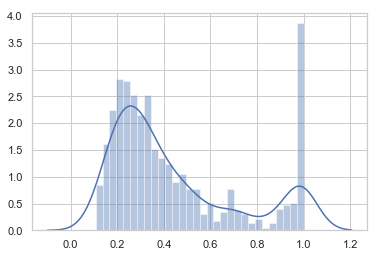

In [28]:
sns.distplot(weights, 30)